In [64]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# epsilon = 0.1
t0 = 0.0
x0 = 300.0
v = 0.5

In [2]:
ls = 2**13
data = np.fromfile('soliton.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
space = np.zeros((ls))
time = np.zeros((lt))
phi1 = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    space[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        field[i,j] = data[ls*i+j,2]

In [173]:
L = 2560.0 
ls = 2**13
space = np.array([ i*L/ls for i in range(ls + 1) ])

T = 2400
lt = 5000
time = np.array([ i*T/lt for i in range(lt + 1) ])

In [174]:
print(time)

[0.00000e+00 4.80000e-01 9.60000e-01 ... 2.39904e+03 2.39952e+03
 2.40000e+03]


In [175]:
print(space) # radius

[0.0000000e+00 3.1250000e-01 6.2500000e-01 ... 2.5593750e+03 2.5596875e+03
 2.5600000e+03]


In [5]:
print(phi1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.05573364e+00 -2.03055700e+00 -1.98148409e+00 ... -1.33724851e-20
   1.20338277e-20 -5.51302973e-21]
 [-5.71541518e-01 -5.73406658e-01 -5.76834962e-01 ...  7.64428972e-21
  -7.10896076e-21  4.08014824e-21]
 ...
 [ 2.26769376e+03  2.25674984e+03  2.23449670e+03 ...  2.37158312e-08
  -1.40634773e-08  4.66951475e-09]
 [ 2.25150702e+03  2.24075004e+03  2.21886463e+03 ... -5.67901202e-09
   3.36743574e-09 -1.11806994e-09]
 [-1.20817016e+03 -1.20623465e+03 -1.20192443e+03 ... -1.89754213e-08
   1.12526381e-08 -3.73625303e-09]]


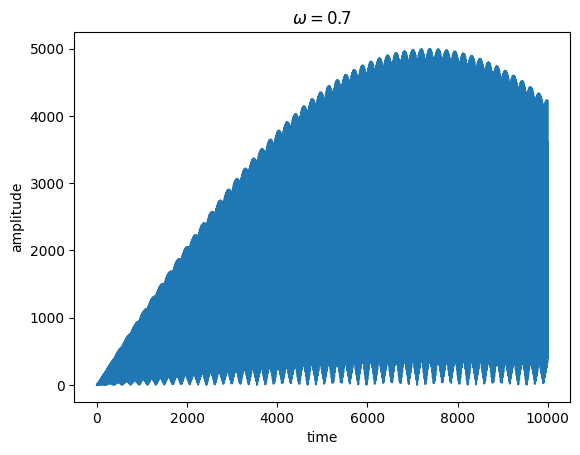

In [7]:
amp1 = np.array([ np.max(np.abs( phi1[i, :] )) for i in range(lt) ])
    
pl.plot(time, amp1)
# pl.xlim(0,50)
pl.xlabel('time')
pl.ylabel('amplitude')
pl.title(r'$\omega = 0.7$')
pl.show()

\begin{equation}
	\large x_c = x_0 + v (t - t_0), \qquad u = \frac{\sqrt{v}}{2} (x - x_c), \qquad \varphi ^{(0)} = \frac{v}{2} \text{sech} ^2 u
\end{equation}

In [71]:
def xc(t):
    return x0 + v*(t - t0)

def u(t, x):
    return (np.sqrt(v)/2) * (x - xc(t))

def soliton(t, x):
    return (v/2) * np.cosh(u(t, x))**(-2)

(275.0, 330.0)

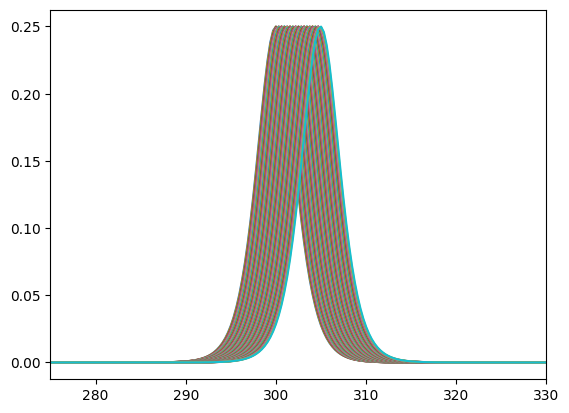

In [80]:
# pl.plot(space, soliton(0, space))
for i in range(100):
    pl.plot(space, soliton(time[100*i], space))
pl.xlim(275.0, 330.0)

\begin{equation}
    \large \lambda = (\lambda ^1 , \lambda ^2) = (x_c , v) ; \qquad \beta ^{(0)} = ( v , 0 )
\end{equation}

\begin{equation}
    \large \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} = \frac{\partial \varphi ^{(0)}}{\partial x_c} = \frac{v^{3/2}}{2} \text{sech}^2 u \tanh u , \qquad \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2} = \frac{\partial \varphi ^{(0)}}{\partial v} = \frac{1}{2} \text{sech}^2 u [1 - u \tanh u]
\end{equation}

In [54]:
def phi0_1(t, x):
    return (v**(3/2)/2) * np.cosh(u(t, x))**(-2) * np.tanh(u(t, x))

def phi0_2(t, x):
    return (1/2) * np.cosh(u(t, x))**(-2) * (1 - u(t, x) * np.tanh(u(t, x)))

(275.0, 330.0)

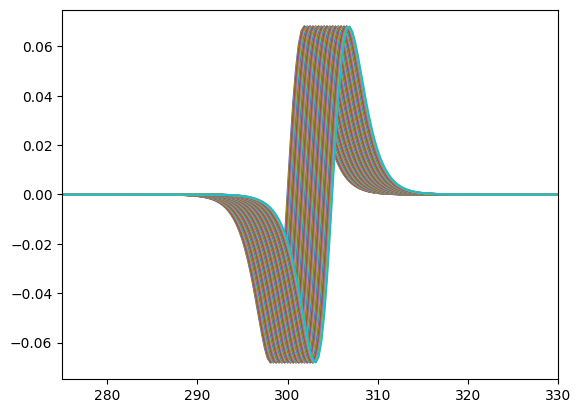

In [82]:
for i in range(100):
    pl.plot(space, phi0_1(100*time[i], space))
pl.xlim(275.0, 330.0)

(275.0, 330.0)

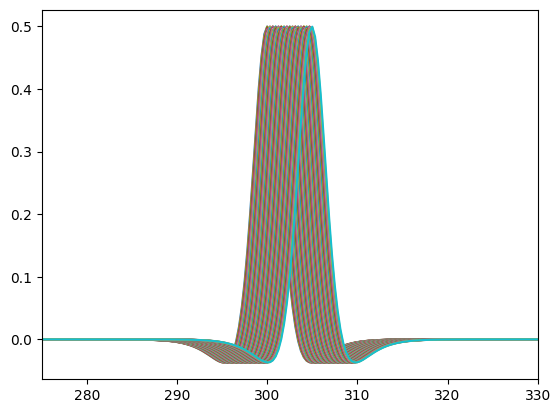

In [83]:
for i in range(100):
    pl.plot(space, phi0_2(100*time[i], space))
pl.xlim(275.0, 330.0)

\begin{gather}
    \large e^{(0)}_1 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(0)}_2 = \frac{1}{2} (t - t_0)^2 \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}, \\
    \large e^{(1)}_1 = \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(1)}_2 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}
\end{gather}

In [99]:
def e0_1(ti): # ti: time index
    return (time[ti] - t0) * phi0_1(time[ti], space)
    
def e0_2(ti):
    return 0.5 * (time[ti] - t0)**2 * phi0_1(time[ti], space) + (time[ti] - t0) * phi0_2(time[ti], space)

def e1_1(ti):
    return phi0_1(time[ti], space)

def e1_2(ti):
    return (time[ti] - t0) * phi0_1(time[ti], space) + phi0_2(time[ti], space)

(275.0, 330.0)

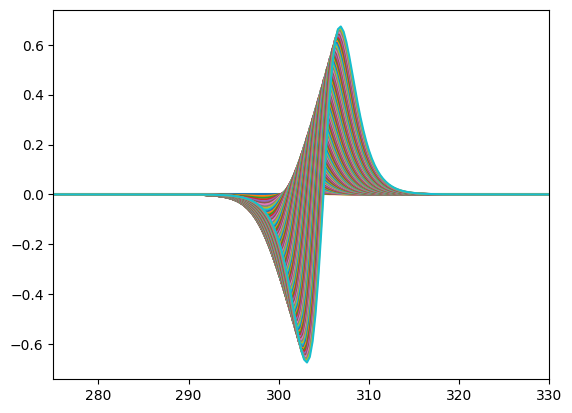

In [100]:
for i in range(100):
    pl.plot(space, e0_1(100*i))
pl.xlim(275.0, 330.0)

(275.0, 330.0)

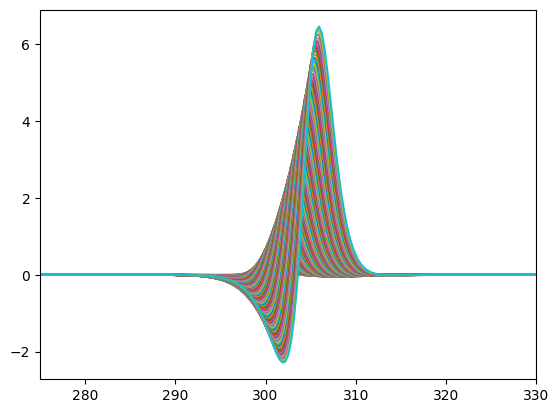

In [101]:
for i in range(100):
    pl.plot(space, e0_2(100*i))
pl.xlim(275.0, 330.0)

(275.0, 330.0)

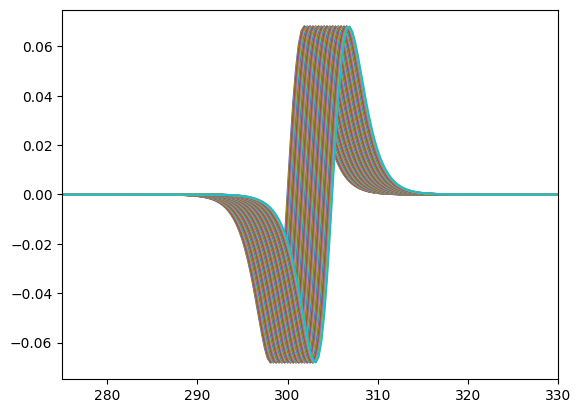

In [102]:
for i in range(100):
    pl.plot(space, e1_1(100*i))
pl.xlim(275.0, 330.0)

(275.0, 330.0)

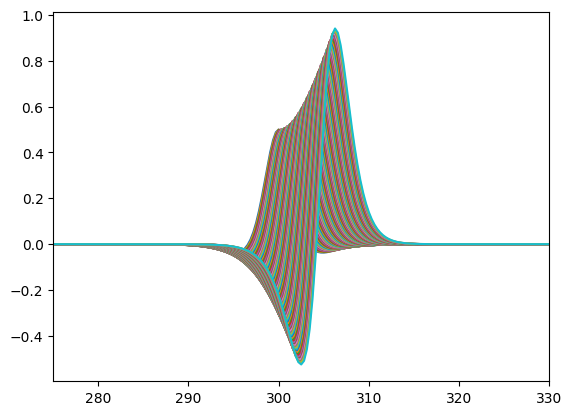

In [103]:
for i in range(100):
    pl.plot(space, e1_2(100*i))
pl.xlim(275.0, 330.0)

\begin{equation}
    \large \int _0 ^{ \infty } f(r) dr = \frac{\pi }{2N\ell} \sum _k^N (\ell ^2 + r_k ^2 ) f(r_k )
\end{equation}

In [104]:
# def integration(f):
#     # N = ls
#     return (np.pi/(2.0 * ls * ell)) * np.sum(np.array([ (ell**2 + radius[i]**2) * f[i] for i in range(ls) ]))

def integration(f): # T: time index, total time
    return integrate.simpson(f, space)

In [105]:
# test
integration(np.exp(-space))

1.0000523722058938

\begin{equation}
    \large M ^{(\mu )(\nu )}_{ij} = \int dt \, dx \, e^{(\mu )}_i e^{(\nu )}_j = \int dt \, m ^{(\mu )(\nu )}_{ij}
\end{equation}

In [107]:
# mu = nu = 0
# ti: time index

# def m00_11(ti):
#     f = e01_1(ti) * e01_1(ti) + e02_1(ti) * e02_1(ti)
#     return integration(f)

# def m00_12(ti):
#     f = e01_1(ti) * e01_2(ti) + e02_1(ti) * e02_2(ti)
#     return integration(f)

# def m00_21(ti):
#     f = e01_2(ti) * e01_1(ti) + e02_2(ti) * e02_1(ti)
#     return integration(f)

def m00_22(ti):
    f = e0_2(ti) * e0_2(ti)
    return integration(f)

# mu = 0, nu = 1

# def m01_11(ti):
#     f = e01_1(ti) * e11_1(ti) + e02_1(ti) * e12_1(ti)
#     return integration(f)

# def m01_12(ti):
#     f = e01_1(ti) * e11_2(ti) + e02_1(ti) * e12_2(ti)
#     return integration(f)

def m01_21(ti):
    f = e0_2(ti) * e1_1(ti)
    return integration(f)

def m01_22(ti):
    f = e0_2(ti) * e1_2(ti)
    return integration(f)

# mu = 1, nu = 0

# def m10_11(ti):
#     f = e11_1(ti) * e01_1(ti) + e12_1(ti) * e02_1(ti)
#     return integration(f)

def m10_12(ti):
    f = e1_1(ti) * e0_2(ti)
    return integration(f)

# def m10_21(ti):
#     f = e11_2(ti) * e01_1(ti) + e12_2(ti) * e02_1(ti)
#     return integration(f)

def m10_22(ti):
    f = e1_2(ti) * e0_2(ti)
    return integration(f)

# mu = 1, nu = 1

def m11_11(ti):
    f = e1_1(ti) * e1_1(ti)
    return integration(f)

def m11_12(ti):
    f = e1_1(ti) * e1_2(ti)
    return integration(f)

def m11_21(ti):
    f = e1_2(ti) * e1_1(ti)
    return integration(f)

def m11_22(ti):
    f = e1_2(ti) * e1_2(ti)
    return integration(f)

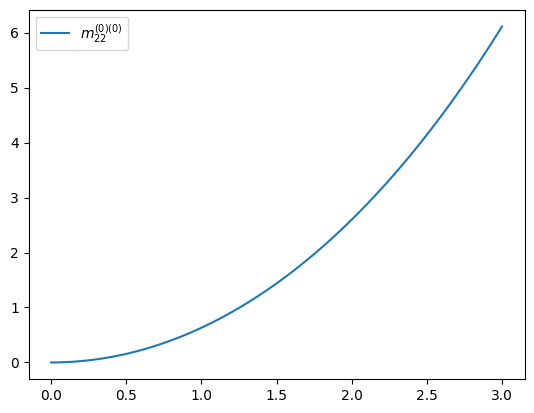

In [109]:
T = 3000
pl.plot(time[:T], [ m00_22(i) for i in range(T) ], label=r'$m^{(0)(0)}_{22}$')
pl.legend()

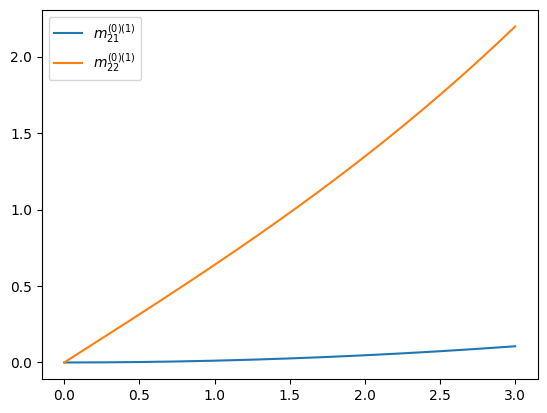

In [110]:
pl.plot(time[:T], [ m01_21(i) for i in range(T) ], label=r'$m^{(0)(1)}_{21}$')
pl.plot(time[:T], [ m01_22(i) for i in range(T) ], label=r'$m^{(0)(1)}_{22}$')
pl.legend()

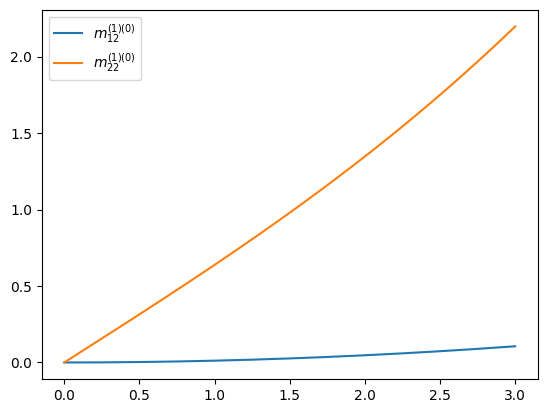

In [111]:
pl.plot(time[:T], [ m10_12(i) for i in range(T) ], label=r'$m^{(1)(0)}_{12}$')
pl.plot(time[:T], [ m10_22(i) for i in range(T) ], label=r'$m^{(1)(0)}_{22}$')
pl.legend()

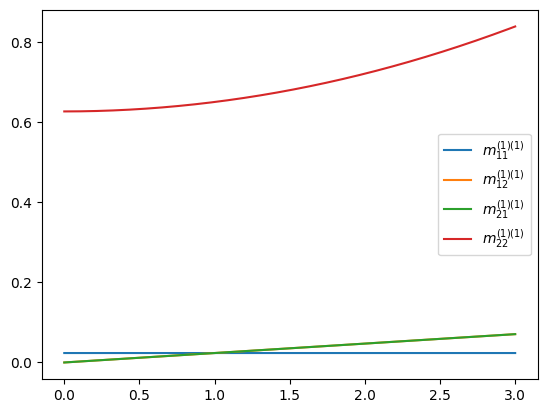

In [112]:
pl.plot(time[:T], [ m11_11(i) for i in range(T) ], label=r'$m^{(1)(1)}_{11}$')
pl.plot(time[:T], [ m11_12(i) for i in range(T) ], label=r'$m^{(1)(1)}_{12}$')
pl.plot(time[:T], [ m11_21(i) for i in range(T) ], label=r'$m^{(1)(1)}_{21}$')
pl.plot(time[:T], [ m11_22(i) for i in range(T) ], label=r'$m^{(1)(1)}_{22}$')
pl.legend()

In [114]:
integrate.simpson([ m00_22(i) for i in range(T) ], time[:T])

5.918678260177647

\begin{equation}
    \large M ^{(\mu) (\nu)}_{ij}= \begin{pmatrix}
    M ^{(0) (0)}_{22} & M ^{(0)(1)}_{21} & M ^{(0)(1)}_{22} \\
    M ^{(1) (0)}_{12} & M ^{(1)(1)}_{11} & M ^{(1)(1)}_{12} \\
    M ^{(1) (0)}_{22} & M ^{(1)(1)}_{21} & M ^{(1)(1)}_{22}
    \end{pmatrix}
\end{equation}

In [122]:
def time_integration(u, T): # T: time index, total time
    return integrate.simpson([ u(i) for i in range(T) ], time[:T])

In [ ]:
# def M(T): # T: time index, total time
#     return np.array([[time_integration(m00_11, T), time_integration(m00_12, T), time_integration(m01_11, T), time_integration(m01_12, T)],
#                      [time_integration(m00_21, T), time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
#                      [time_integration(m10_11, T), time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
#                      [time_integration(m10_21, T), time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

def M(T): # T: time index, total time
    return np.array([[time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
                    [time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
                    [time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

In [126]:
A = M(100)

In [127]:
np.linalg.matrix_rank(A)

3

In [128]:
print(np.linalg.inv(A))

[[ 1.97405195e+04  1.61230693e+01 -9.77155717e+02]
 [ 1.61230693e+01  4.28602237e+02 -1.59616425e+00]
 [-9.77155717e+02 -1.59616425e+00  6.44918810e+01]]


In [129]:
print(np.matmul(A, np.linalg.inv(A)))

[[ 1.00000000e+00  1.22783206e-18 -7.84267772e-17]
 [ 1.59914794e-17  1.00000000e+00 -3.53385934e-19]
 [ 9.99080958e-15 -3.46386695e-18  1.00000000e+00]]


In [124]:
for tt in [100, 200, 300, 400]:
    print(M(tt))

[[2.02638874e-04 3.81169446e-06 3.07039918e-03]
 [3.81169446e-06 2.33345238e-03 1.15505893e-04]
 [3.07039918e-03 1.15505893e-04 6.20301722e-02]]
[[1.64607431e-03 3.09579166e-05 1.24094435e-02]
 [3.09579166e-05 4.69047498e-03 4.66702261e-04]
 [1.24094435e-02 4.66702261e-04 1.24733504e-01]]
[[5.58503350e-03 1.05008889e-04 2.80279820e-02]
 [1.05008889e-04 7.04749759e-03 1.05360089e-03]
 [2.80279820e-02 1.05360089e-03 1.87530645e-01]]
[[1.32770581e-02 2.49534836e-04 4.99436217e-02]
 [2.49534836e-04 9.40452019e-03 1.87620178e-03]
 [4.99436217e-02 1.87620178e-03 2.50468736e-01]]


\begin{equation}
    \large V ^{(\nu )}_{i} = \int dt \, dx \, e^{(\nu )}_i \varphi ^{(1)} = \int dt \, v ^{(\nu )}_{i}
\end{equation}

In [137]:
# def v0_1(ti):
#     g = e01_1(ti) * phi1[ti]
#     return integration(g)

def v0_2(ti):
    g = e0_2(ti) * phi1[ti]
    return integration(g)

def v1_1(ti):
    g = e1_1(ti) * phi1[ti]
    return integration(g)

def v1_2(ti):
    g = e1_2(ti) * phi1[ti]
    return integration(g)

In [138]:
# def V(T): # T: time index, total time
#     return np.array([[time_integration(v0_1, T)],
#                      [time_integration(v0_2, T)],
#                      [time_integration(v1_1, T)],
#                      [time_integration(v1_2, T)]])

def V(T): # T: time index, total time
    return np.array([[time_integration(v0_2, T)],
                     [time_integration(v1_1, T)],
                     [time_integration(v1_2, T)]])

In [139]:
for tt in [100, 200, 300, 400]:
    print(V(tt))

[[5.69113149e-06]
 [4.71882350e-04]
 [2.00601001e-03]]
[[5.69113149e-06]
 [4.71882350e-04]
 [2.00601001e-03]]
[[5.69113149e-06]
 [4.71882350e-04]
 [2.00601001e-03]]
[[5.69113149e-06]
 [4.71882350e-04]
 [2.00601001e-03]]


\begin{equation}
    \large \psi ^{i (\mu)} = ((M^{-1})^{(\mu)(\nu)})^{ij} V_j^{(\nu)}
\end{equation}

In [140]:
def psi(T): # T: time index, total time
    return np.matmul(np.linalg.inv(M(T)), V(T))

In [178]:
psi(5000)

array([[ 7.77426783e-08],
       [ 6.78434002e-02],
       [-1.12316353e-04]])

In [179]:
time

array([0.00000e+00, 4.80000e-01, 9.60000e-01, ..., 2.39904e+03,
       2.39952e+03, 2.40000e+03])

In [181]:
TT = [ 2, 100, 250 , 500 , 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000 ]
PP = [ psi(tt) for tt in TT ]

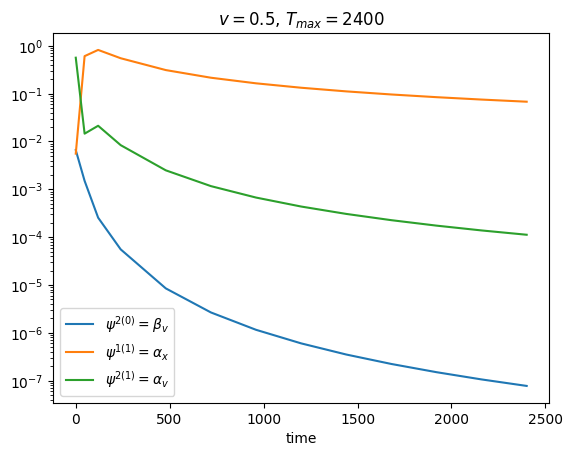

In [187]:
pl.plot(time[TT], np.abs([ PP[i][0, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], np.abs([ PP[i][1, 0] for i in range(len(TT)) ]), label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], np.abs([ PP[i][2, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 0.5$, $ T_{max} = 2400$')
pl.savefig('v0-5_abs.png')

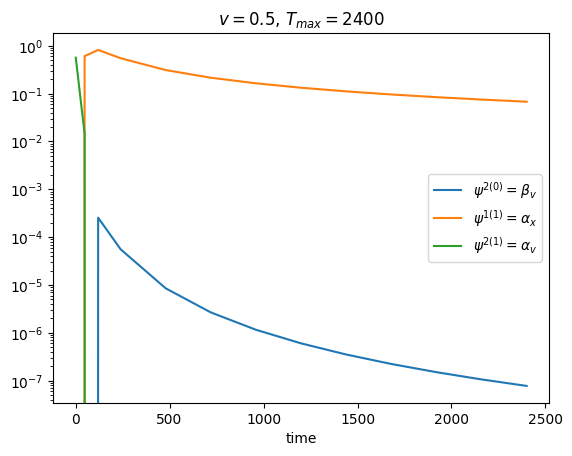

In [188]:
pl.plot(time[TT], [ PP[i][0, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], [ PP[i][1, 0] for i in range(len(TT)) ], label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], [ PP[i][2, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 0.5$, $ T_{max} = 2400$')
pl.savefig('v0-5.png')

\begin{equation}
    \large \varphi ^{(1)} _{\perp} = \varphi ^{(1)} - \psi ^{j (\mu )} e^{(\mu )}_j
\end{equation}

In [201]:
P = PP[-1]
print(P)
T = 1000
I = phi1[T] - (P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + + P[2][0]*e1_2(T))

[[ 7.77426783e-08]
 [ 6.78434002e-02]
 [-1.12316353e-04]]


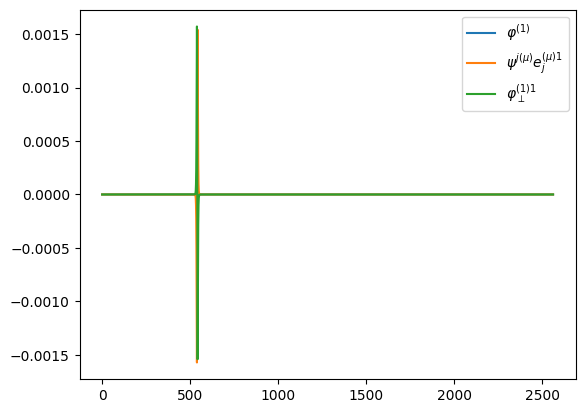

In [203]:
pl.plot(space, phi1[T], label=r'$\varphi ^{(1)} $')
pl.plot(space, P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + + P[2][0]*e1_2(T), label=r'$\psi ^{j (\mu )} e^{(\mu ) 1}_j$')
pl.plot(space, I, label=r'$\varphi ^{(1) 1} _{\perp}$')
pl.legend()
pl.savefig('1.png')